In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import plotly.express as px
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

Reading Data from Johns Hopkins Covid-19 dataset on GitHub

In [ ]:
#defining a function to read all 3 files
def get_frame(name):
    url = (
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
        f'csse_covid_19_time_series/time_series_covid19_{name}_global.csv')
    df = pd.read_csv(url)
    return df

#defining a function to read from specific url
def get_frame_url(url):
    df = pd.read_csv(url)
    return df

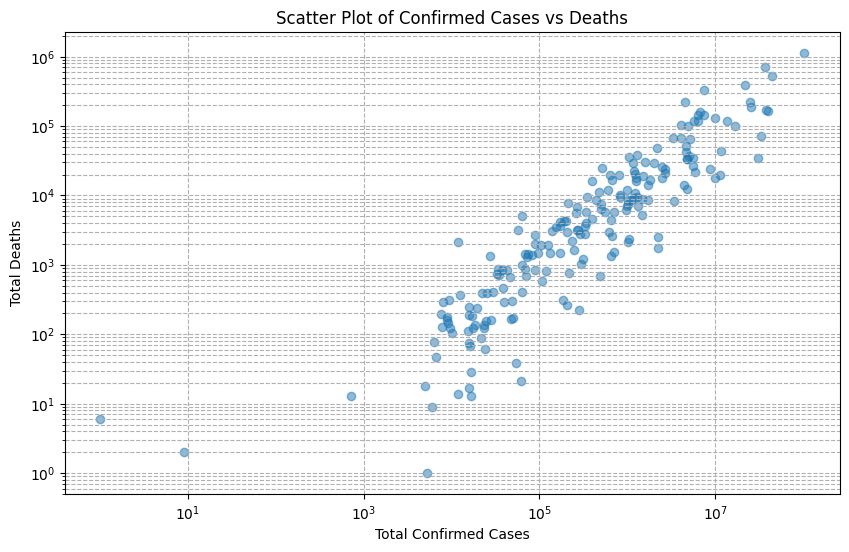

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read the CSV files from the GitHub repository
def get_frame(name):
    url = (
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
        f'csse_covid_19_time_series/time_series_covid19_{name}_global.csv')
    df = pd.read_csv(url)
    return df

# Load the data
confirmed_df = get_frame('confirmed')
deaths_df = get_frame('deaths')

# Prepare the data for scatter plot
def prepare_data_for_scatter(confirmed_df, deaths_df):
    # Group by 'Country/Region' and sum the cases
    confirmed_grouped = confirmed_df.groupby('Country/Region').sum().iloc[:, -1]
    deaths_grouped = deaths_df.groupby('Country/Region').sum().iloc[:, -1]

    # Create a DataFrame with the summed cases
    scatter_df = pd.DataFrame({
        'Confirmed': confirmed_grouped,
        'Deaths': deaths_grouped
    }).reset_index()

    return scatter_df

# Get the data for scatter plot
scatter_df = prepare_data_for_scatter(confirmed_df, deaths_df)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Confirmed'], scatter_df['Deaths'], alpha=0.5)
plt.title('Scatter Plot of Confirmed Cases vs Deaths')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Total Deaths')
plt.xscale('log')  # Using logarithmic scale for better visualization
plt.yscale('log')  # Using logarithmic scale for better visualization
plt.grid(True, which="both", ls="--")
plt.show()


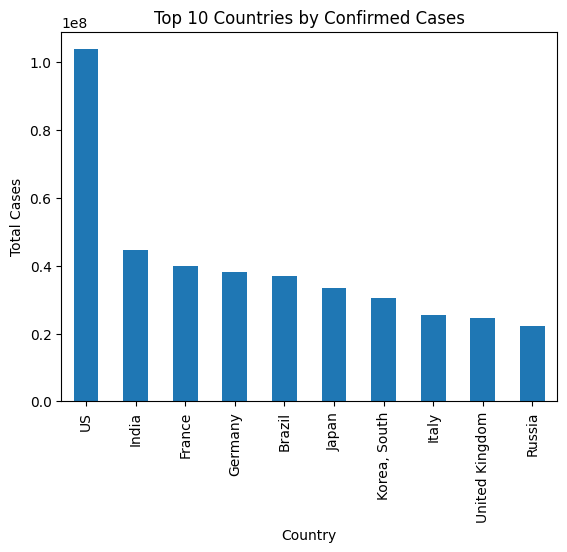

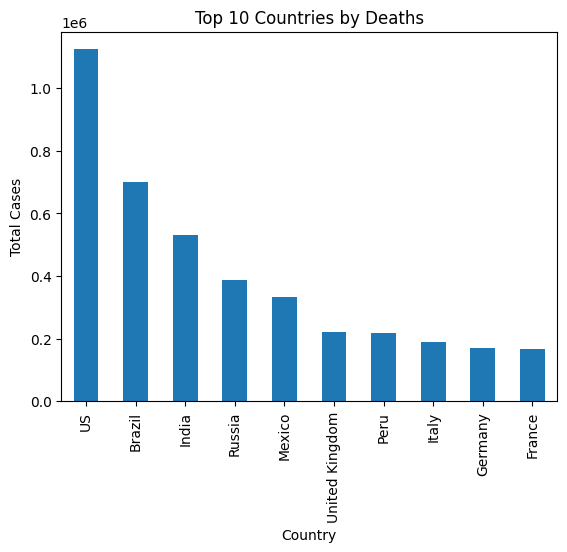

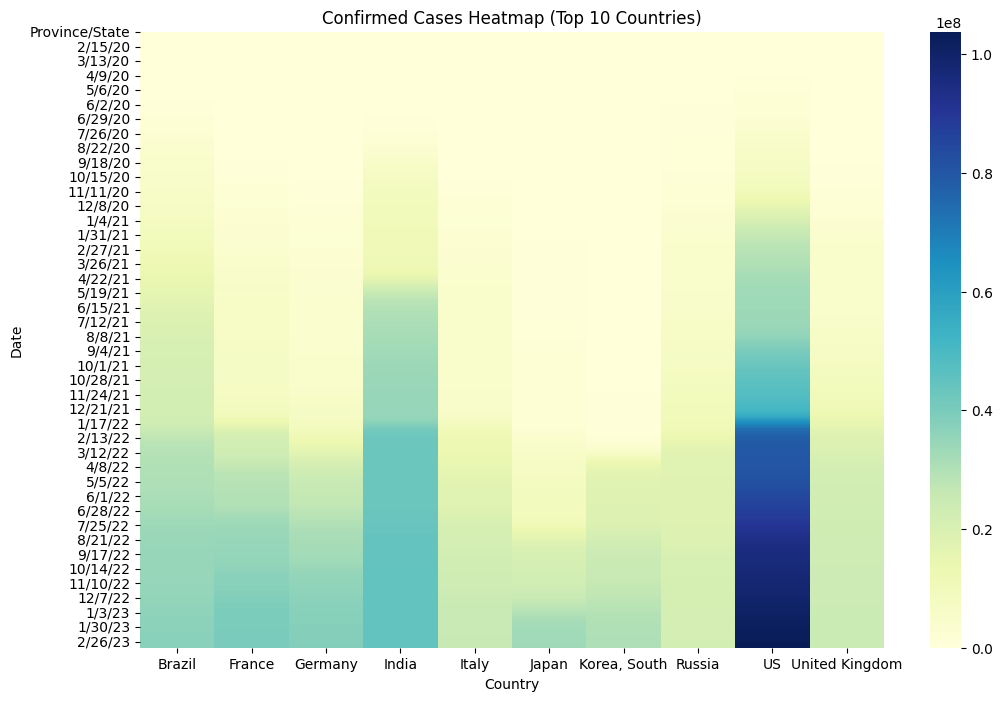

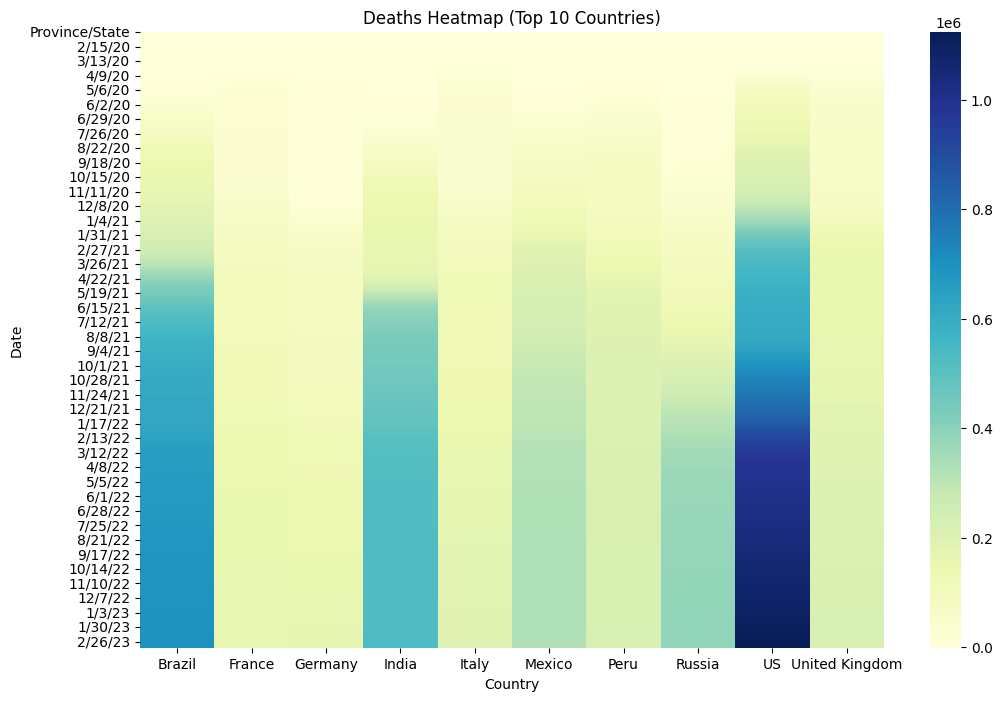

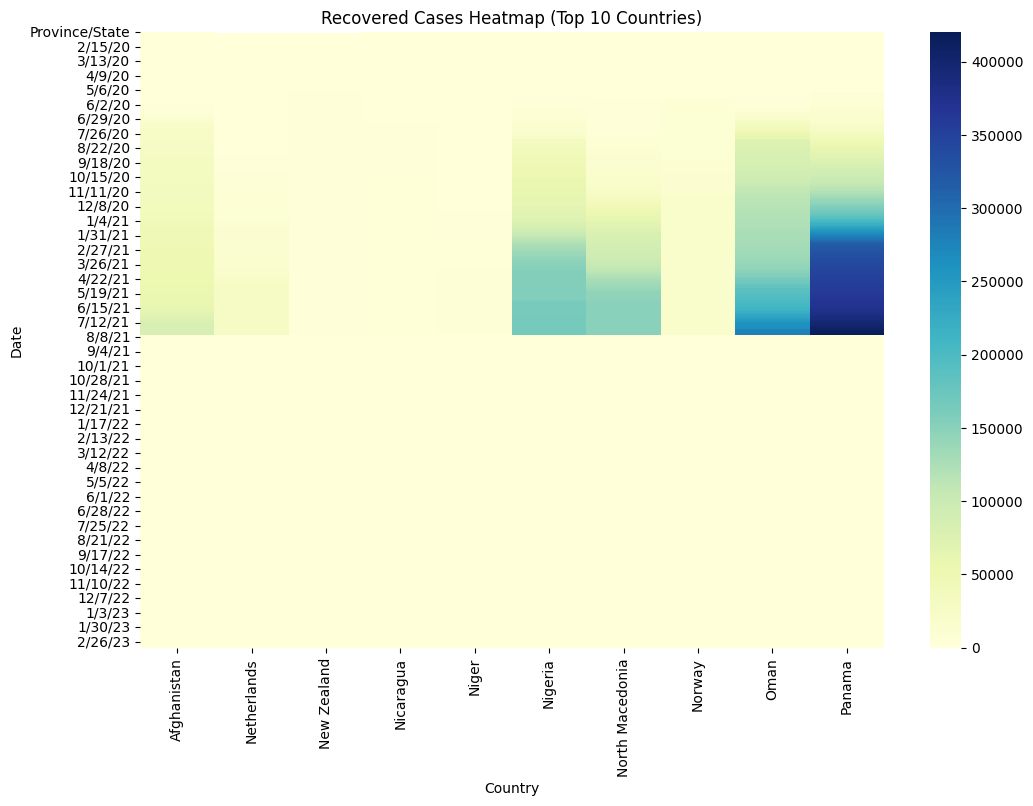

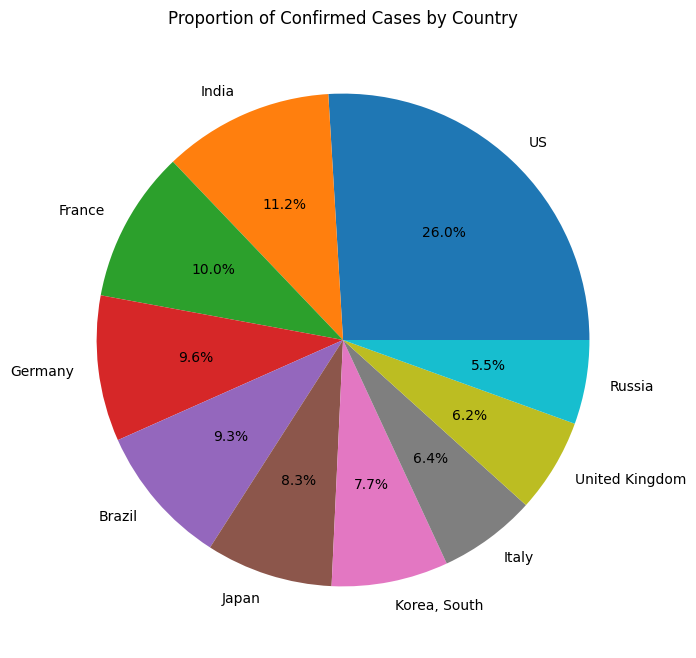

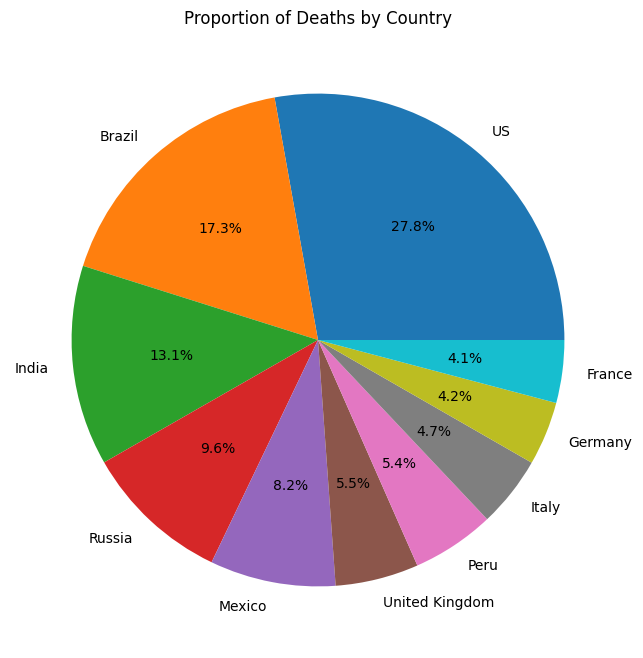

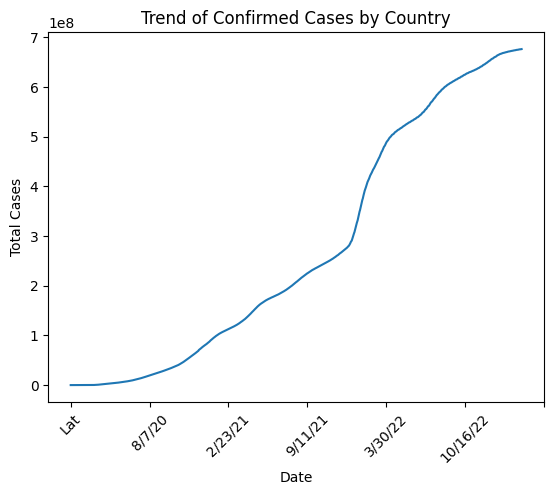

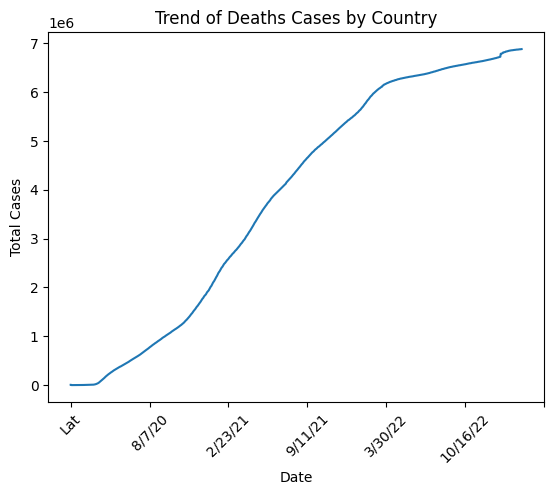

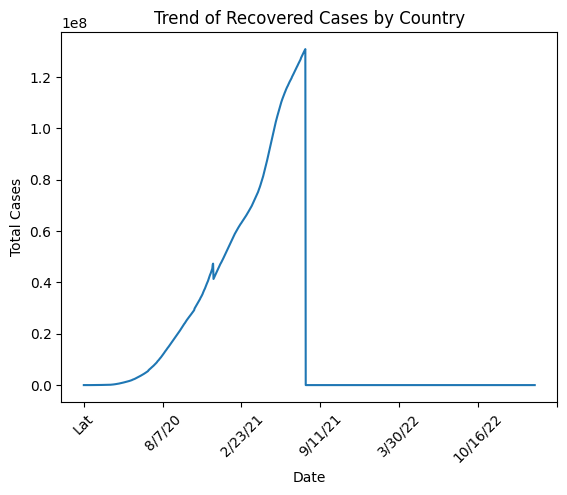

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data using the provided functions
confirmed_df = get_frame('confirmed')
deaths_df = get_frame('deaths')
recovered_df = get_frame('recovered')

def plot_trend(df, title):
    # Convert all columns except 'Country/Region' and 'Province/State' to numeric
    numeric_cols = df.columns.drop(['Country/Region', 'Province/State'])
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Sum numeric columns
    df_sum = df.drop(['Country/Region', 'Province/State'], axis=1).sum()

    # Plot the trend
    df_sum.plot(title=title)
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.xticks(rotation=45)
    plt.show()


# Bar plot for total cases by country
def plot_total_cases(df, title):
    df_country = df.groupby('Country/Region').sum().iloc[:, -1].sort_values(ascending=False)
    df_country.head(10).plot(kind='bar', title=title)
    plt.xlabel('Country')
    plt.ylabel('Total Cases')
    plt.show()

plot_total_cases(confirmed_df, 'Top 10 Countries by Confirmed Cases')
plot_total_cases(deaths_df, 'Top 10 Countries by Deaths')


def plot_heatmap(df, title):
    # Filter out rows that are not actual countries (based on the 'Country/Region' column)
    df_countries = df[~df['Country/Region'].str.contains('^(?:French Guiana|French Polynesia|Guadeloupe|Martinique|Mayotte|New Caledonia|Reunion|Saint Barthelemy|Saint Pierre and Miquelon|St Martin|Wallis and Futuna)$')]

    # Group by country and sum
    df_country = df_countries.groupby('Country/Region').sum().iloc[:, -1]

    # Select top 10 countries by cases
    top_countries = df_country.sort_values(ascending=False).head(10).index

    # Filter DataFrame to include only top countries
    df_top_countries = df_countries[df_countries['Country/Region'].isin(top_countries)]

    # Group by country and transpose DataFrame
    df_top_countries = df_top_countries.groupby('Country/Region').sum().T

    # Convert non-numeric values to NaN
    df_top_countries = df_top_countries.apply(pd.to_numeric, errors='coerce')

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_countries, cmap='YlGnBu')
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Date')
    plt.show()

plot_heatmap(confirmed_df, 'Confirmed Cases Heatmap (Top 10 Countries)')
plot_heatmap(deaths_df, 'Deaths Heatmap (Top 10 Countries)')
plot_heatmap(recovered_df, 'Recovered Cases Heatmap (Top 10 Countries)')

# Pie chart for proportion of cases by country
def plot_pie_chart(df, title):
    df_country = df.groupby('Country/Region').sum().iloc[:, -1].sort_values(ascending=False)
    top_countries = df_country.sort_values(ascending=False).head(10)
    plt.figure(figsize=(8, 8))
    plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

plot_pie_chart(confirmed_df, 'Proportion of Confirmed Cases by Country')
plot_pie_chart(deaths_df, 'Proportion of Deaths by Country')

confirmed_df = plot_trend(confirmed_df, "Trend of Confirmed Cases by Country")
deaths_df = plot_trend(deaths_df, "Trend of Deaths Cases by Country")
recovered_df = plot_trend(recovered_df, "Trend of Recovered Cases by Country")

In [ ]:
pip install wordcloud matplotlib


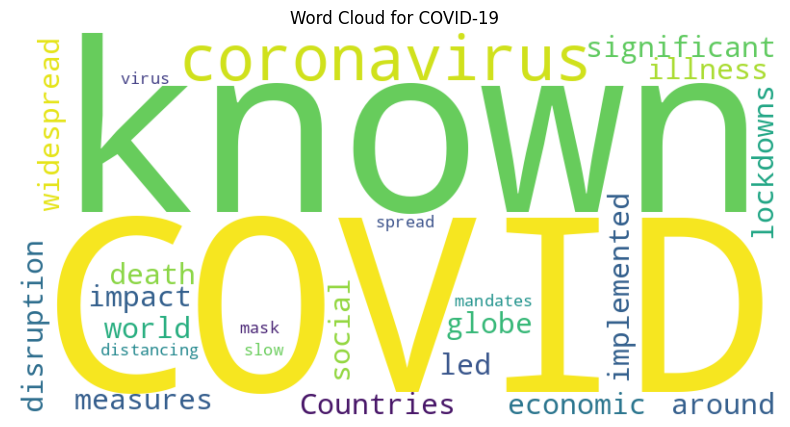

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text_data = """
COVID-19, also known as the coronavirus, has had a significant impact on the world.
It has led to widespread illness, death, and economic disruption.
Countries around the globe have implemented measures such as lockdowns,
social distancing, and mask mandates to slow the spread of the virus.
"""

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for COVID-19')
plt.show()

In [ ]:
df_cases=get_frame('confirmed') #raw-data for confirmed cases
df_deaths=get_frame('deaths') #raw-data for deaths
df_recovered = get_frame('recovered') #raw-data for recovered cases

df_cases=df_cases.drop(columns=['Lat','Long','Province/State'])
df_deaths=df_deaths.drop(columns=['Lat','Long','Province/State'])
df_recovered=df_recovered.drop(columns=['Lat','Long','Province/State'])
df_cases.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
df_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
df_recovered.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=get_frame_url('https://raw.githubusercontent.com/vijayaiitk/Covid-19-analysis/main/population_by_country_2020.csv')
df=df.rename(columns={'Country (or dependency)': 'Country','Population (2020)':'Population'})
df['Country'] = df['Country'].replace('United States','US')
df=df[['Country','Population']]
#pop share is population of a country out of total world population
df['Pop_share']=(df['Population']*100.00/df['Population'].sum()).round(2)
df.head()

,Country,Population,Pop_share
0,China,1440297825,18.45
1,India,1382345085,17.70
2,US,331341050,4.24
3,Indonesia,274021604,3.51
4,Pakistan,221612785,2.84


Current Trend
Since we have cumulative numbers, we will be taking the most recent date to get latest

In [ ]:
#current data
res_cases=df_cases.columns.to_list()
res_deaths=df_deaths.columns.to_list()
res_recovered=df_recovered.columns.to_list()

#taking data of most recent date
dftoday_cases=df_cases[['Country/Region',res_cases[len(res_cases)-1]]]
dftoday_deaths=df_deaths[['Country/Region',res_deaths[len(res_cases)-1]]]
dftoday_recovered=df_recovered[['Country/Region',res_recovered[len(res_cases)-1]]]


dftoday_cases.columns=['Country','Total_cases']
dftoday_deaths.columns=['Country','Total_deaths']
dftoday_recovered.columns=['Country','Total_recovered']


dftoday_cases=dftoday_cases.groupby(['Country'])['Total_cases'].sum().reset_index()
dftoday_deaths=dftoday_deaths.groupby(['Country'])['Total_deaths'].sum().reset_index()
dftoday_recovered=dftoday_recovered.groupby(['Country'])['Total_recovered'].sum().reset_index()


#dftoday has current cases, deaths & recovered
dftoday=dftoday_cases.merge(dftoday_deaths.merge(dftoday_recovered, on='Country'), on='Country')


#Adding %infected column
dftoday=dftoday.merge(df, on='Country')
dftoday.reset_index(drop=True, inplace=True)
dftoday['%infected']=(dftoday['Total_cases']*100.00/dftoday['Population']).round(2)
dftoday['Mortality Rate(%)']=(dftoday['Total_deaths']*100.00/dftoday['Total_cases']).round(2)


#current stats
print('Worldwide cases',':', (dftoday['Total_cases'].sum()/1000000).round(2),'Million')
print('Worldwide deaths',':', (dftoday['Total_deaths'].sum()/1000000).round(2),'Million')
print('Worldwide recovered',':', (dftoday['Total_recovered'].sum()/1000000).round(2),'Million')
print('Mortality Rate(%)',':', (dftoday['Total_deaths'].sum()*100.00/dftoday['Total_cases'].sum()).round(2),'%')
print('Infection Rate(%)',':', (dftoday['Total_cases'].sum()*100.00/dftoday['Population'].sum()).round(2),'%')

Worldwide cases : 629.52 Million
Worldwide deaths : 6.76 Million
Worldwide recovered : 0.0 Million
Mortality Rate(%) : 1.07 %
Infection Rate(%) : 8.4 %


In [ ]:
#Covid-index is covid share/pop share of that country. If covid_index > 1 it's bad
dftoday['Covid_index']=((dftoday['Total_cases']/dftoday['Total_cases'].sum()*100.00)/dftoday['Pop_share']).round(2)
dftoday[dftoday['Pop_share'] !=0].sort_values(by='Covid_index',ascending=False).head()

,Country,Total_cases,Total_deaths,Total_recovered,Population,Pop_share,%infected,Mortality Rate(%),Covid_index
9,Austria,5961143,21970,0,9015361,0.12,66.12,0.37,7.89
42,Denmark,3451036,8345,0,5795780,0.07,59.54,0.24,7.83
89,Latvia,976255,6269,0,1882408,0.02,51.86,0.64,7.75
56,France,39866718,166176,0,65298930,0.84,61.05,0.42,7.54
148,Slovenia,1331707,7078,0,2078989,0.03,64.06,0.53,7.05


In [ ]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


GEOSPATIAL DATA (WORLDWIDE CASES)

In [ ]:
#Plotting Geospatial data (current cases across countries)
import chart_studio.plotly as py
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type='choropleth',
            locations = dftoday['Country'],
            locationmode = 'country names',
            colorscale = 'Reds',
            text = dftoday['Country'],
            z = dftoday['Total_cases'],
            colorbar = {'title':"Total_cases"}
            )

layout = dict(title = 'Worldwide cases ',
              geo = dict(showframe = False,projection = {'type':'natural earth'}
             ))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

GEOSPATIAL DATA (WORLDWIDE DEATHS)

In [ ]:
#Plotting Geospatial data (current deaths across countries)
import chart_studio.plotly as py
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type='choropleth',
            locations = dftoday['Country'],
            locationmode = 'country names',
            colorscale = 'Reds',
            text = dftoday['Country'],
            z = dftoday['Total_deaths'],
            colorbar = {'title':"Total_deaths"}
            )

layout = dict(title = 'Worldwide deaths ',
              geo = dict(showframe = False,projection = {'type':'natural earth'}
             ))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Top 10 worst hit countries & their contribution

In [ ]:
cbar=dftoday.sort_values(by='Total_cases',ascending=False).head(10)
cbar.reset_index(drop=True, inplace=True)
cbar=cbar.sort_values(by='Total_cases')
x = cbar['Country']
y = cbar['Total_cases']

import plotly.express as px
fig = px.bar(cbar, x="Total_cases", y="Country",orientation='h',text='Total_cases')
fig.update_layout(
    title={
        'text': 'Total Confirmed Cases',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
#Top 10 worst hit countries & their contribution (cases as of today)
pie=dftoday[['Country','Total_cases','Total_deaths','Total_recovered']]
pie=pie.sort_values(by='Total_cases',ascending=False).head(10)
pie.reset_index(drop=True, inplace=True)
row_10=['Others',dftoday.Total_cases.sum()-pie.Total_cases.sum(),dftoday.Total_deaths.sum()-
        pie.Total_deaths.sum(),dftoday.Total_recovered.sum()-pie.Total_recovered.sum()]
pie.loc[10]=row_10

import plotly.express as px
fig = px.pie(pie, values= 'Total_cases', names="Country")
fig.update_layout(
    title={
        'text': "Worldwide COVID-19 Cases",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(hole=.4,textposition='outside', textinfo='percent+label')
fig.show()

In [ ]:
#Mortality rate of countries with Top 10 highest cases
bard=dftoday.sort_values(by='Total_deaths',ascending=False).head(10)
bard.reset_index(drop=True, inplace=True)
bard=bard.sort_values(by='Total_deaths').reset_index()

x = bard['Country']
y = bard['Total_deaths']

import plotly.express as px
fig = px.bar(bard, x="Total_deaths", y="Country",orientation='h',text='Total_deaths')
fig.update_layout(
    title={
        'text': 'Total Deaths',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
#Top 10 worst hit countries & their contribution (deaths as of today)
pie=dftoday[['Country','Total_cases','Total_deaths','Total_recovered']]
pie=pie.sort_values(by='Total_deaths',ascending=False).head(10)
pie.reset_index(drop=True, inplace=True)
row_10=['Others',dftoday.Total_cases.sum()-pie.Total_cases.sum(),dftoday.Total_deaths.sum()-pie.Total_deaths.sum(),dftoday.Total_recovered.sum()-pie.Total_recovered.sum()]
pie.loc[10]=row_10

fig = px.pie(pie, values= 'Total_deaths', names="Country")
fig.update_layout(
    title={
        'text': "Worldwide COVID-19 Deaths",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(hole=.4,textposition='outside', textinfo='percent+label')

fig.show()

In [ ]:
hbar=dftoday.sort_values(by='Total_cases',ascending=False).head(15)
hbar=hbar.sort_values(by='Total_cases').reset_index()
x = hbar['Country']
y = hbar['%infected']

import plotly.express as px
fig = px.bar(hbar, x="%infected", y="Country",orientation='h',text='%infected')
fig.update_layout(width=1000,
    height=600,
    title={
        'text': 'Infection_rate(%)',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
#Mortality rate of countries with Top 10 highest cases
bar=dftoday.sort_values(by='Total_cases',ascending=False).head(15)
bar.reset_index(drop=True, inplace=True)
bar['Mortality_Rate']=(bar['Total_deaths']*100.00/bar['Total_cases']).round(2)
bar=bar.sort_values(by='Total_cases').reset_index()

x = bar['Country']
y = bar['Mortality_Rate']

import plotly.express as px
fig = px.bar(bar, x="Mortality_Rate", y="Country",orientation='h',text='Mortality_Rate')
fig.update_layout(width=1000,
    height=600,
    title={
        'text': 'Mortality Rate(%)',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
hbar=dftoday.sort_values(by='Total_cases',ascending=False).head(15)
hbar=hbar.sort_values(by='Total_cases').reset_index()
x = hbar['Country']
y = hbar['Covid_index']

import plotly.express as px
fig = px.bar(hbar, x="Covid_index", y="Country",orientation='h',text='Covid_index')
fig.update_layout(width=1000,
    height=600,
    title={
        'text': 'Covid_Index',
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Time-series analysis and visualization of Covid Cases & Deaths across Countries

In [ ]:
#creating tables to store day-level data across countries

#historical cases per country
tempc=pd.melt(df_cases, id_vars=['Country/Region'], var_name='Date', value_name='Cases')
tempc1=tempc.groupby(['Country/Region','Date'])['Cases'].sum().reset_index()
tempc1.columns = ['Country', 'Date','Cases']
tempc1['Date']=pd.to_datetime(tempc1['Date'])

#adding Total rows(summation across countries) for each day
totalc=tempc1.groupby(['Date'])['Cases'].sum().reset_index().sort_values(by='Cases')
totalc['Country']='Total'

framesc=[tempc1,totalc]
dfch=pd.concat(framesc)

#historical deaths per country
tempd=pd.melt(df_deaths, id_vars=['Country/Region'], var_name='Date', value_name='Deaths')
tempd1=tempd.groupby(['Country/Region','Date'])['Deaths'].sum().reset_index()
tempd1.columns = ['Country', 'Date','Deaths']
tempd1['Date']=pd.to_datetime(tempd1['Date'])

#adding Total rows(summation across countries) for each day
totald=tempd1.groupby(['Date'])['Deaths'].sum().reset_index().sort_values(by='Deaths')
totald['Country']='Total'

framesd=[tempd1,totald]
dfdh=pd.concat(framesd)

#historical recovery per country
tempr=pd.melt(df_recovered, id_vars=['Country/Region'], var_name='Date', value_name='Recovered')
tempr1=tempr.groupby(['Country/Region','Date'])['Recovered'].sum().reset_index()
tempr1.columns = ['Country', 'Date','Recovered']
tempr1['Date']=pd.to_datetime(tempr1['Date'])

#adding Total rows(summation across countries) for each day
totalr=tempr1.groupby(['Date'])['Recovered'].sum().reset_index().sort_values(by='Recovered')
totalr['Country']='Total'

framesr=[tempr1,totalr]
dfrh=pd.concat(framesr)

#dfhist has cumulative cases, deaths, recovered for each day & country
dfhist=dfch.merge(dfdh.merge(dfrh, on=['Country','Date']), on=['Country','Date'])
dfhist['Date']=pd.to_datetime(dfhist['Date'])
dfhist.head()

,Country,Date,Cases,Deaths,Recovered
0,Afghanistan,2021-01-01,52513,2201,41727
1,Afghanistan,2022-01-01,158107,7356,0
2,Afghanistan,2023-01-01,207616,7849,0
3,Afghanistan,2021-01-10,53489,2277,43948
4,Afghanistan,2022-01-10,158394,7373,0


In [ ]:
pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.7 MB/s eta 0:00:00


Bar Chart race of Covid19 Cases